<a href="https://colab.research.google.com/github/saad-mhmd/fractal_figures_an_electronic_study/blob/main/fractal_figures_an_electronic_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pythtb

In [ ]:
import numpy as np
from pythtb import *
import matplotlib.pyplot as plt

# Sierpinski Traingle

In [ ]:
def triangle(gen, gen_o, pos_x, pos_y):
    global ind
    if gen < gen_o:
        orb.append([pos_x - 1 / (3 * np.power(2, gen)) + 1 / np.power(2, gen+1),
                    pos_y - 1 / (3 * np.power(2, gen))])
        orb.append([pos_x - 1 / (3 * np.power(2, gen)),
                    pos_y - 1 / (3 * np.power(2, gen)) + 1 / np.power(2, gen+1)])
        orb.append([pos_x - 1 / (3 * np.power(2, gen)) + 1 / np.power(2, gen+1),
                    pos_y - 1 / (3 * np.power(2, gen)) + 1 / np.power(2, gen+1)])
        triangle(gen + 1, gen_o,
                 pos_x - 1 / (3 * np.power(2, gen+1)),
                 pos_y - 1 / (3 * np.power(2, gen+1)))
        triangle(gen + 1, gen_o,
                 pos_x - 1 / (3 * np.power(2, gen+1)) + 1 / np.power(2, gen + 1),
                 pos_y - 1 / (3 * np.power(2, gen+1)))
        triangle(gen + 1, gen_o,
                 pos_x - 1 / (3 * np.power(2, gen+1)),
                 pos_y - 1 / (3 * np.power(2, gen+1)) + 1 / np.power(2, gen + 1))
    else:
        if [pos_x, pos_y] not in orb and pos_x != 1.0 and pos_y != 1.0:
            orb.append([pos_x, pos_y])


In [ ]:
a = 1
b = 1
theta = [0, np.pi / 3]
theta90 = [theta[1] - np.pi / 2, theta[0] + np.pi / 2]

In [ ]:
lat = [[a * np.cos(theta[0]), a * np.sin(theta[0])], [b * np.cos(theta[1]), b * np.sin(theta[1])]]
lat_rec = [[2 * np.pi / b * np.cos(theta90[0]), 2 * np.pi / b * np.sin(theta90[0])],
           [2 * np.pi / a * np.cos(theta90[1]), 2 * np.pi / a * np.sin(theta90[1])]]

In [ ]:
t = -1
orb = []
hops = []
g = 5
orb.append([0, 0])
triangle(0, g, 1/3, 1/3)
tresh = round(np.sqrt(2 * np.power(1 / (3 * np.power(2, g-1)), 2)), 3)
for l in range(len(orb)):
    vec_l = [orb[l][0] * lat[0][0] + orb[l][1] * lat[1][0], orb[l][0] * lat[0][1] + orb[l][1] * lat[1][1]]
    for lp in range(l+1, len(orb)):
        vec_lp = [orb[lp][0] * lat[0][0] + orb[lp][1] * lat[1][0], orb[lp][0] * lat[0][1] + orb[lp][1] * lat[1][1]]
        opp = [vec_l[0] - vec_lp[0], vec_l[1] - vec_lp[1]]
        dist = np.sqrt(np.power(opp[0], 2) + np.power(opp[1], 2))
        dist = round(dist, 3)
        if dist <= tresh:
            hops.append([l, lp])

In [ ]:
tr = tb_model(2, 2, lat, orb)
tr_rec = tb_model(2, 2, lat_rec, orb)

In [ ]:
for i in hops:
    tr.set_hop(t, i[0], i[1], [0, 0])
for ind in range(len(orb)):
    x = round(orb[ind][0], 3)
    y = round(orb[ind][1], 3)
    if x == round(1 - 2/(3 * np.power(2, g)), 3) and y == round(1/(3 * np.power(2, g)), 3):
        tr.set_hop(t, ind, 0, [1, 0])
    if x == round(1/(3 * np.power(2, g)), 3) and y == round(1 - 2/(3 * np.power(2, g)), 3):
        tr.set_hop(t, ind, 0, [0, 1])

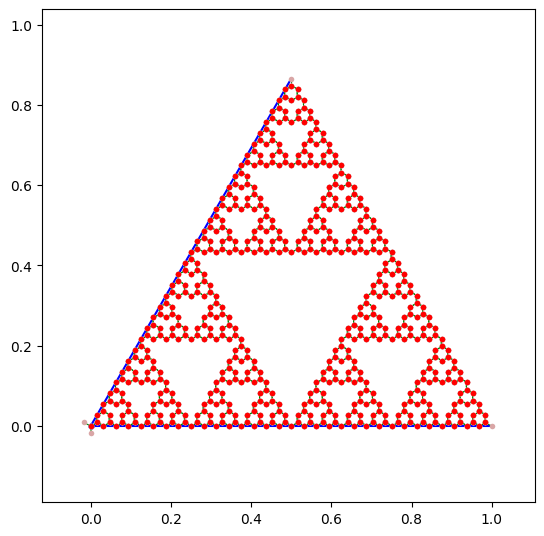

In [ ]:
(fig, axis1) = tr.visualize(0, 1)
fig.savefig("triangle.png")

In [ ]:
tr_slab = tr.cut_piece(3, 0)
tr_slab = tr_slab.cut_piece(3, 1)

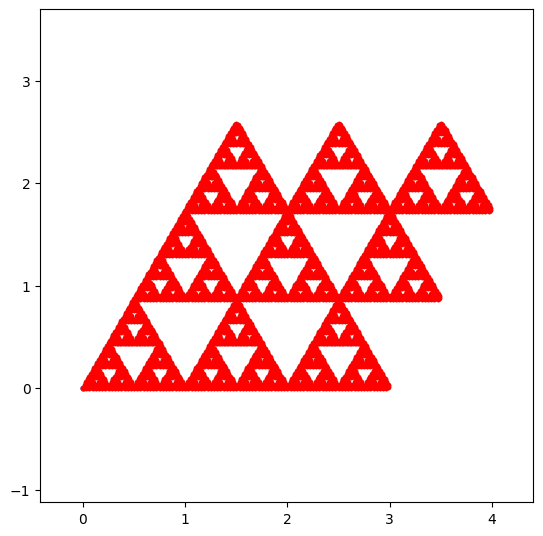

In [ ]:
(fig, axis2) = tr_slab.visualize(0, 1)
fig.savefig("triangle_slab.png")

In [ ]:
k = [[0, 0], [2 / 3, 1 / 3], [.5, .5], [1 / 3, 2 / 3], [0, 0]]
label = ["$\Gamma$", "K", "M", "K'", "$\Gamma$"]

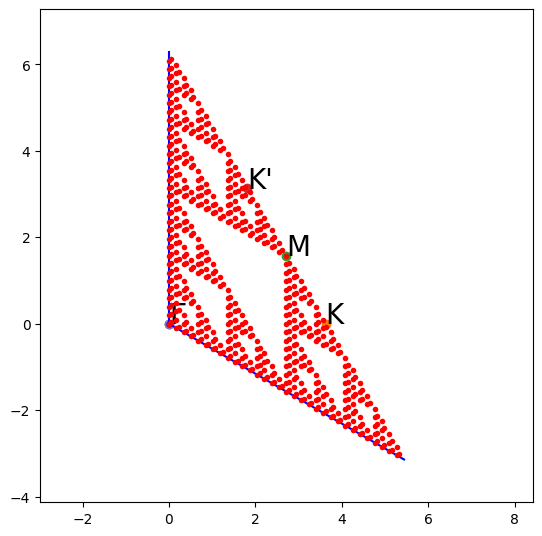

In [ ]:
sym_points = []
(fig, axis3) = tr_rec.visualize(0, 1)
for i in range(len(k)):
    s = [k[i][0] * lat_rec[0][0] + k[i][1] * lat_rec[1][0], k[i][0] * lat_rec[0][1] + k[i][1] * lat_rec[1][1]]
    sym_points.append(s)
    axis3.scatter(s[0], s[1])
    plt.text(s[0], s[1], s=label[i], fontsize=20)
fig.savefig("triangle_rec.png")

In [ ]:
(k_vec, k_dist, k_node) = tr.k_path(k, 100)
evals = tr.solve_all(k_vec)

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.33333 0.66667]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[ 0.00000e+00  0.00000e+00]
 [ 6.66667e-01 -9.53811e-17]
 [ 5.00000e-01  2.88675e-01]
 [ 3.33333e-01  5.77350e-01]
 [ 0.00000e+00  0.00000e+00]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [0.5 0.5]
  length = 0.33333  from  [0.5 0.5]  to  [0.33333 0.66667]
  length = 0.66667  from  [0.33333 0.66667]  to  [0. 0.]
node distance list: [0.      0.66667 1.      1.33333 2.     ]
node index list:    [ 0 33 50 66 99]
----- k_path report end ------------



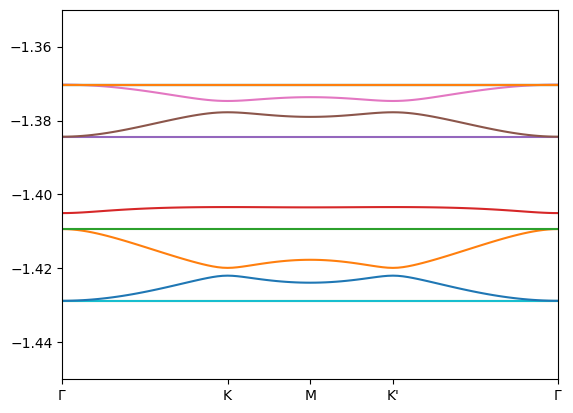

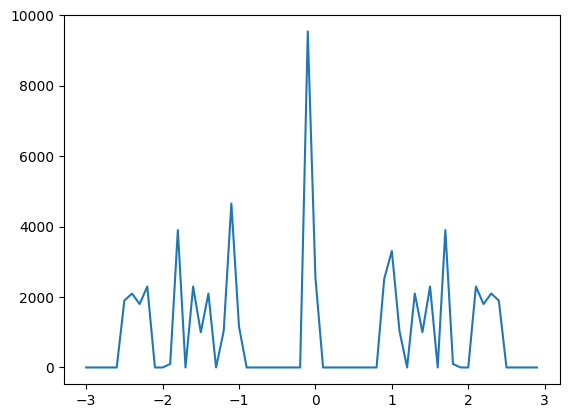

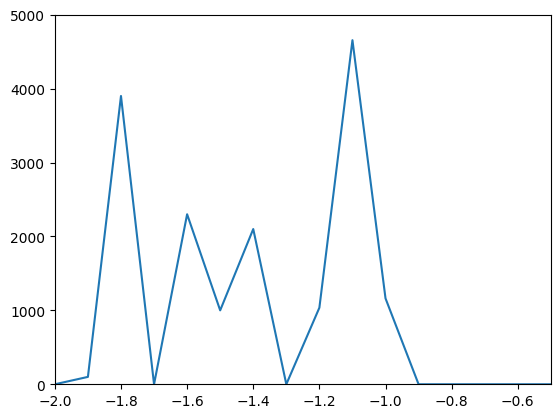

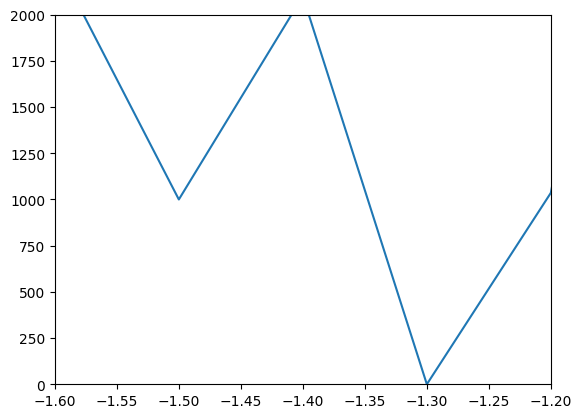

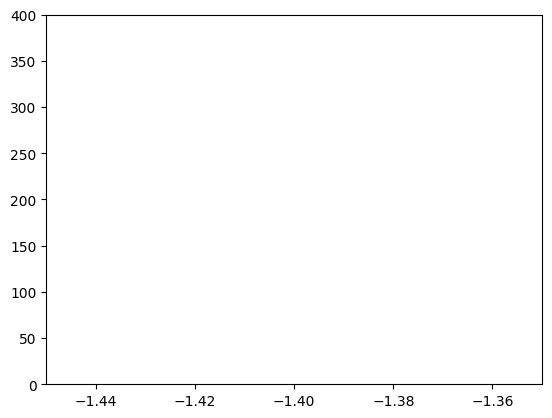

In [ ]:
(fig, ax) = plt.subplots()
orb_place = []
discrete = 10e-2
dos = [0]*int((6/discrete))
energy = []
for i in range(int((6/discrete))):
    energy.append(discrete*i - 3)
for e in range(len(orb)):
    orb_place.append(e)
for i in orb_place:
    ax.plot(k_dist, evals[i])
place = -3
placed = 0
while place < 3:
    for i in range(len(evals)):
        for j in range(len(evals[i])):
            if place <= evals[i][j] <= place+discrete:
                dos[placed] += 1
    place += discrete
    placed += 1
ax.set_xticks(k_node)
ax.set_xticklabels(label)
ax.set_xlim(k_dist[0], k_dist[-1])
fig.savefig("band_tr.png")
ax.set_ylim(-2, -0.5)
fig.savefig("band_tr2.png")
ax.set_ylim(-1.6, -1.2)
fig.savefig("band_tr3.png")
ax.set_ylim(-1.45, -1.35)
fig.savefig("band_tr4.png")
(fig, axdos) = plt.subplots()
axdos.plot(energy,dos)
fig.savefig("dos.png")
(fig, axdos2) = plt.subplots()
axdos2.plot(energy,dos)
axdos2.set_xlim(-2, -0.5)
axdos2.set_ylim(0, 5000)
fig.savefig("dos2.png")
(fig, axdos3) = plt.subplots()
axdos3.plot(energy,dos)
axdos3.set_xlim(-1.6, -1.2)
axdos3.set_ylim(0, 2000)
fig.savefig("dos3.png")
(fig, axdos4) = plt.subplots()
axdos4.plot(energy,dos)
axdos4.set_xlim(-1.45, -1.35)
axdos4.set_ylim(0, 400)
fig.savefig("dos4.png")

# Sierpinksi Carpet

0.037
----- k_path report begin ----------
real-space lattice vectors
 [[1.00000e+00 0.00000e+00]
 [6.12323e-17 1.00000e+00]]
k-space metric tensor
 [[ 1.00000e+00 -6.12323e-17]
 [-6.12323e-17  1.00000e+00]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.33333 0.66667]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.00000e+00 -6.12323e-17]
 [ 0.00000e+00  1.00000e+00]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.33333 0.66667]
 [0.      0.     ]]
list of segments:
  length = 0.74536  from  [0. 0.]  to  [0.66667 0.33333]
  length =  0.2357  from  [0.66667 0.33333]  to  [0.5 0.5]
  length =  0.2357  from  [0.5 0.5]  to  [0.33333 0.66667]
  length = 0.74536  from  [0.33333 0.66667]  to  [0. 0.]
node distance list: [0.      0.74536 0.98106 1.21676 1.96212]
node index list:    [ 0 38 50 61 99]
----- k_path report end ------------



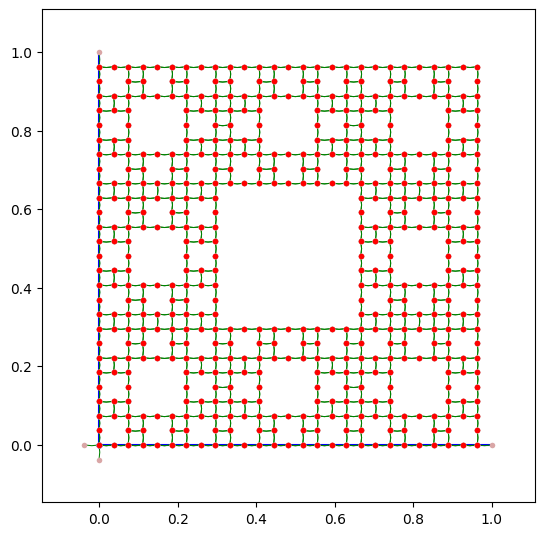

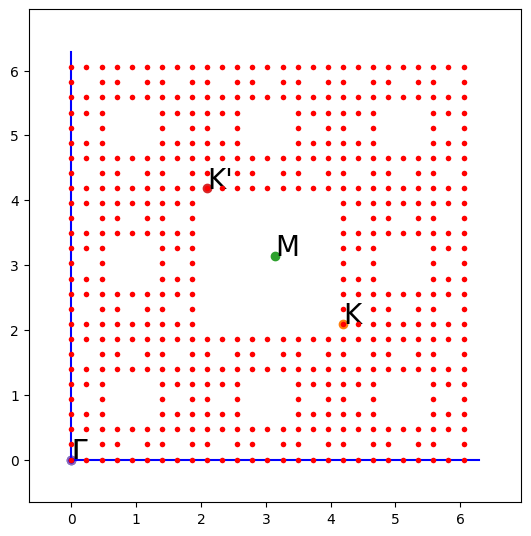

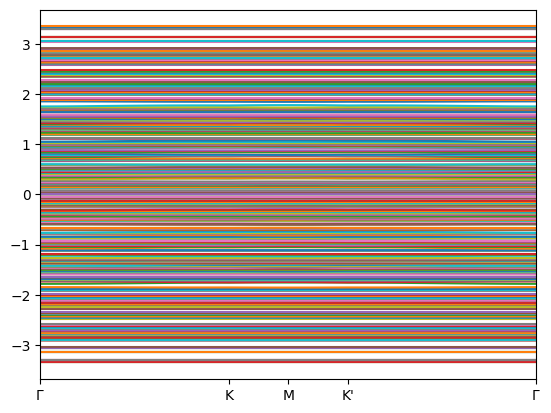

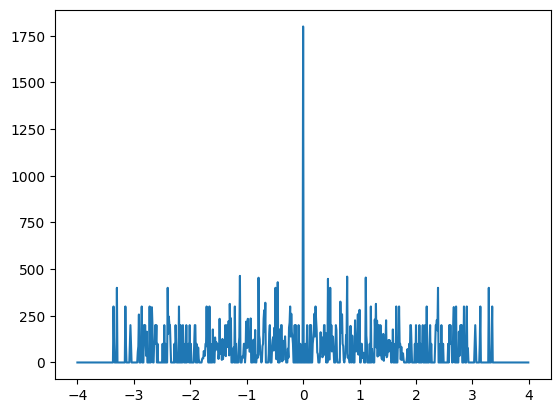

In [ ]:
orb = []  # Declare the "orb" variable, contains the coordinates of all points in the Sierpinski Carpet up to the specified level of recursion

def carpet(gen, gen_o, pos_x, pos_y, size=1):
    if gen == gen_o:
        return
    s = size / 3
    for dx in range(3):
        for dy in range(3):
            if dx == 1 and dy == 1:
                continue
            new_x = pos_x + dx * s
            new_y = pos_y + dy * s
            new_orb = [new_x, new_y]
            if new_orb not in orb:
                orb.append(new_orb)
            carpet(gen + 1, gen_o, new_x, new_y, s)


a = 1
b = 1
theta = [0, np.pi / 2]
theta90 = [theta[1] - np.pi / 2, theta[0] + np.pi / 2]

lat = [[a * np.cos(theta[0]), a * np.sin(theta[0])], [b * np.cos(theta[1]), b * np.sin(theta[1])]]
lat_rec = [[2 * np.pi / b * np.cos(theta90[0]), 2 * np.pi / b * np.sin(theta90[0])],
           [2 * np.pi / a * np.cos(theta90[1]), 2 * np.pi / a * np.sin(theta90[1])]]

t = -1
hops = []
g = 3
carpet(0, g, 0.0, 0.0)  # Generate the Sierpinski Carpet
tresh = round(1 / (np.power(3, g)), 3)
print(tresh)

# Pre-compute orb * lat
lat = np.array(lat)  # Convert lat to a NumPy array
vec = np.dot(np.array(orb), lat.T)  # Now you can transpose it

for l in range(len(orb)):
    for lp in range(l + 1, len(orb)):
        opp = vec[l] - vec[lp]
        dist = np.sqrt(np.sum(np.power(opp, 2)))
        dist = round(dist, 3)
        if dist <= tresh:
            hops.append([l, lp])

tr = tb_model(2, 2, lat, orb)
tr_rec = tb_model(2, 2, lat_rec, orb)

for i in hops:
    tr.set_hop(t, i[0], i[1], [0, 0])
for ind in range(len(orb)):
    x = round(orb[ind][0], 3)
    y = round(orb[ind][1], 3)
    if x == round(1 - 1 / np.power(3, g), 3) and y == 0:
        tr.set_hop(t, ind, 0, [1, 0])
    if y == round(1 - 1 / np.power(3, g), 3) and x == 0:
        tr.set_hop(t, ind, 0, [0, 1])

(fig, axis1) = tr.visualize(0, 1)
fig.savefig("carpet.png")

k = [[0, 0], [2 / 3, 1 / 3], [.5, .5], [1 / 3, 2 / 3], [0, 0]]
label = ["$\Gamma$", "K", "M", "K'", "$\Gamma$"]

sym_points = []
(fig, axis3) = tr_rec.visualize(0, 1)
for i in range(len(k)):
    s = [k[i][0] * lat_rec[0][0] + k[i][1] * lat_rec[1][0], k[i][0] * lat_rec[0][1] + k[i][1] * lat_rec[1][1]]
    sym_points.append(s)
    axis3.scatter(s[0], s[1])
    plt.text(s[0], s[1], s=label[i], fontsize=20)
fig.savefig("triangle_rec.png")

(k_vec, k_dist, k_node) = tr.k_path(k, 100)
evals = tr.solve_all(k_vec)

(fig, ax) = plt.subplots()
orb_place = []
discrete = 10e-3
dos = [0]*int((8/discrete))
energy = []
for i in range(int((8/discrete))):
    energy.append(discrete*i - 4)
for e in range(len(orb)):
    orb_place.append(e)
for i in orb_place:
    ax.plot(k_dist, evals[i])
place = -4
placed = 0
while place < 4:
    for i in range(len(evals)):
        for j in range(len(evals[i])):
            if place <= evals[i][j] <= place+discrete:
                dos[placed] += 1
    place += discrete
    placed += 1
ax.set_xticks(k_node)
ax.set_xticklabels(label)
ax.set_xlim(k_dist[0], k_dist[-1])
fig.savefig("band_tr.png")
(fig, axdos) = plt.subplots()
axdos.plot(energy,dos)
fig.savefig("dos.png")
#(fig, axdos2) = plt.subplots()
#axdos2.plot(energy,dos)
#axdos2.set_xlim(-3.5, 2.1)
#fig.savefig("dos2.png")